In [1]:
import pandas as pd
from random import randint

In [2]:
df = pd.read_csv('attackers.csv')

In [3]:
df

,Name,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists
0,Ian Natura,Brazil,1995,SS,1.95,78.35,Canon Yaoundé,23,19,14
1,Patrick Meyerpeter,Walles,1996,WG,1.84,69.43,Canon Yaoundé,25,8,13
2,Cao Jones,Korean,1993,WG,1.57,75.26,Canon Yaoundé,17,28,2
3,Joan Zacarias,Mexico,2004,SS,1.86,69.69,Canon Yaoundé,48,58,18
4,Eduardo Shorman,Germany,1999,SS,1.67,73.01,Canon Yaoundé,36,49,29
...,...,...,...,...,...,...,...,...,...,...
20176,Juan Navarrete,Spain,2000,RM,1.55,79.10,FC Talant,39,26,12
20177,Ng Chand,Korean,2001,CF,1.68,76.94,FC Talant,6,3,3
20178,Germano Firmino,Brazil,1996,AM,1.76,76.16,FC Talant,33,7,33
20179,Juca Nara,Brazil,1995,SS,1.94,80.75,FC Talant,46,89,32


In [4]:
df['Nationality']

0          Brazil
1          Walles
2          Korean
3          Mexico
4         Germany
           ...   
20176       Spain
20177      Korean
20178      Brazil
20179      Brazil
20180    Japanese
Name: Nationality, Length: 20181, dtype: object

In [5]:
df['Nationality'].unique()

array(['Brazil', 'Walles', 'Korean', 'Mexico', 'Germany', 'Chinese',
       'Colombia', 'Argentina', 'Japanese', 'England', 'Uruguay',
       'Paraguay', 'United States', 'Chile', 'Spain'], dtype=object)

In [6]:
df['Nationality'].value_counts()

Nationality
Brazil           4580
Japanese         1984
Chinese          1980
Korean           1967
England          1162
Walles           1159
Germany          1141
United States    1094
Argentina         852
Uruguay           827
Colombia          784
Mexico            699
Spain             656
Paraguay          651
Chile             645
Name: count, dtype: int64

In [7]:
ages = df['Birth Year']

In [8]:
int(ages.mean()) # average of players birth year

1997

In [9]:
average_age = abs(int(ages.mean()) -2023)

In [10]:
average_age

26

In [11]:
# Now lets pick a player and look at his football numbers

In [12]:
n = randint(0,20180)

player = df.filter(items = [n], axis=0)

In [13]:
player

,Name,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists
12581,Nick Sbrocco,United States,1995,WG,1.53,84.25,Metalist Kharkiv,25,27,16


In [14]:
goals = player['Goals'].values[0]
assists = player['Assists'].values[0]
matches = player['Matches'].values[0]

In [15]:
gpm = goals / matches # calculate the players goals per matches

gpm = round(gpm, 1)

In [16]:
apm = assists / matches # calculate the players assis

apm = round(apm, 1)

In [17]:
gapm = (goals + assists) / matches # calculate how many goals the player delivers per matches

gapm = round(gapm, 1)

In [18]:
gapm

1.7

In [19]:
new_values = { 'Goals Per Matches': gpm, 'Assists Per Matches': apm, 'Goals and Assists Per Matches': gapm }

In [20]:
new_values

{'Goals Per Matches': 1.1,
 'Assists Per Matches': 0.6,
 'Goals and Assists Per Matches': 1.7}

In [21]:
'''
new_df = pd.DataFrame([new_values])

player = pd.concat([player, new_df], ignore_index=True)
'''

'\nnew_df = pd.DataFrame([new_values])\n\nplayer = pd.concat([player, new_df], ignore_index=True)\n'

In [22]:
player

,Name,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists
12581,Nick Sbrocco,United States,1995,WG,1.53,84.25,Metalist Kharkiv,25,27,16


In [23]:
player.loc[:, ['Goals Per Matches', 'Assists Per Matches','Goals and Assists Per Matches']] = [gpm, apm, gapm]

In [24]:
player

,Name,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists,Goals Per Matches,Assists Per Matches,Goals and Assists Per Matches
12581,Nick Sbrocco,United States,1995,WG,1.53,84.25,Metalist Kharkiv,25,27,16,1.1,0.6,1.7


In [25]:
df["Goals Per Matches"] = df.apply(lambda row: round(row['Goals'] / row['Matches'],1) if row['Matches'] else 0, axis=1)
df

,Name,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists,Goals Per Matches
0,Ian Natura,Brazil,1995,SS,1.95,78.35,Canon Yaoundé,23,19,14,0.8
1,Patrick Meyerpeter,Walles,1996,WG,1.84,69.43,Canon Yaoundé,25,8,13,0.3
2,Cao Jones,Korean,1993,WG,1.57,75.26,Canon Yaoundé,17,28,2,1.6
3,Joan Zacarias,Mexico,2004,SS,1.86,69.69,Canon Yaoundé,48,58,18,1.2
4,Eduardo Shorman,Germany,1999,SS,1.67,73.01,Canon Yaoundé,36,49,29,1.4
...,...,...,...,...,...,...,...,...,...,...,...
20176,Juan Navarrete,Spain,2000,RM,1.55,79.10,FC Talant,39,26,12,0.7
20177,Ng Chand,Korean,2001,CF,1.68,76.94,FC Talant,6,3,3,0.5
20178,Germano Firmino,Brazil,1996,AM,1.76,76.16,FC Talant,33,7,33,0.2
20179,Juca Nara,Brazil,1995,SS,1.94,80.75,FC Talant,46,89,32,1.9


In [26]:
df["Assists Per Matches"] = df.apply(lambda row: round(row['Assists'] / row['Matches'],1) if row['Matches'] else 0, axis=1)

In [27]:
df

,Name,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists,Goals Per Matches,Assists Per Matches
0,Ian Natura,Brazil,1995,SS,1.95,78.35,Canon Yaoundé,23,19,14,0.8,0.6
1,Patrick Meyerpeter,Walles,1996,WG,1.84,69.43,Canon Yaoundé,25,8,13,0.3,0.5
2,Cao Jones,Korean,1993,WG,1.57,75.26,Canon Yaoundé,17,28,2,1.6,0.1
3,Joan Zacarias,Mexico,2004,SS,1.86,69.69,Canon Yaoundé,48,58,18,1.2,0.4
4,Eduardo Shorman,Germany,1999,SS,1.67,73.01,Canon Yaoundé,36,49,29,1.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
20176,Juan Navarrete,Spain,2000,RM,1.55,79.10,FC Talant,39,26,12,0.7,0.3
20177,Ng Chand,Korean,2001,CF,1.68,76.94,FC Talant,6,3,3,0.5,0.5
20178,Germano Firmino,Brazil,1996,AM,1.76,76.16,FC Talant,33,7,33,0.2,1.0
20179,Juca Nara,Brazil,1995,SS,1.94,80.75,FC Talant,46,89,32,1.9,0.7


In [28]:
df["Goals and Assists Per Matches"] = df.apply(lambda row: round((row['Goals'] + row['Assists']) / row['Matches'],1) if row['Matches'] else 0, axis=1)

In [29]:
df

,Name,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists,Goals Per Matches,Assists Per Matches,Goals and Assists Per Matches
0,Ian Natura,Brazil,1995,SS,1.95,78.35,Canon Yaoundé,23,19,14,0.8,0.6,1.4
1,Patrick Meyerpeter,Walles,1996,WG,1.84,69.43,Canon Yaoundé,25,8,13,0.3,0.5,0.8
2,Cao Jones,Korean,1993,WG,1.57,75.26,Canon Yaoundé,17,28,2,1.6,0.1,1.8
3,Joan Zacarias,Mexico,2004,SS,1.86,69.69,Canon Yaoundé,48,58,18,1.2,0.4,1.6
4,Eduardo Shorman,Germany,1999,SS,1.67,73.01,Canon Yaoundé,36,49,29,1.4,0.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20176,Juan Navarrete,Spain,2000,RM,1.55,79.10,FC Talant,39,26,12,0.7,0.3,1.0
20177,Ng Chand,Korean,2001,CF,1.68,76.94,FC Talant,6,3,3,0.5,0.5,1.0
20178,Germano Firmino,Brazil,1996,AM,1.76,76.16,FC Talant,33,7,33,0.2,1.0,1.2
20179,Juca Nara,Brazil,1995,SS,1.94,80.75,FC Talant,46,89,32,1.9,0.7,2.6


In [44]:
flu = df.loc[df['Club'] == 'Fluminense']
flu = flu.set_index('Name')

In [45]:
flu

,Nationality,Birth Year,Position,Height,Weight,Club,Matches,Goals,Assists,Goals Per Matches,Assists Per Matches,Goals and Assists Per Matches
Name,,,,,,,,,,,,
Guillermo Velasquez,Mexico,1992,WG,1.82,71.20,Fluminense,14,6,0,0.4,0.0,0.4
Zhu Tseng,Korean,2000,WG,1.55,71.48,Fluminense,22,17,17,0.8,0.8,1.5
Freeman Ciarlo,Germany,2001,LM,1.86,77.98,Fluminense,56,62,16,1.1,0.3,1.4
Szeto Yun,Korean,1990,AM,1.66,71.99,Fluminense,18,3,13,0.2,0.7,0.9
Frankie Waldbaum,Walles,1990,SS,1.67,79.62,Fluminense,48,91,8,1.9,0.2,2.1
Xu Grewal,Japanese,2005,AM,1.55,80.89,Fluminense,19,20,16,1.1,0.8,1.9
Yue Oh,Japanese,2002,AM,1.69,74.48,Fluminense,60,13,5,0.2,0.1,0.3
Gau Haq,Chinese,2000,LM,1.61,79.51,Fluminense,48,92,25,1.9,0.5,2.4
Coleman Gambler,England,2005,CF,1.75,71.16,Fluminense,38,3,8,0.1,0.2,0.3


<Axes: xlabel='Name'>

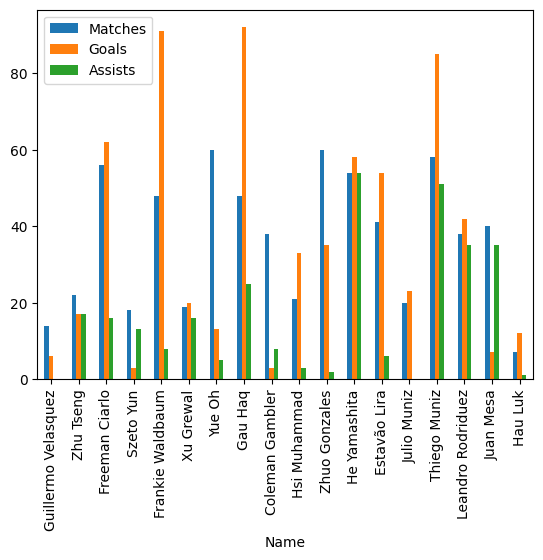

In [48]:
flu.filter(items = ['Goals', 'Assists', 'Matches' ], axis = 1).plot.bar()